In [1]:
#Importar pacotes
import pandas as pd
import numpy as np
import csv as csv

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Shuffle the datasets
from sklearn.utils import shuffle

#Learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

import tensorflow as tf
import math
from tensorflow.python.framework import ops
import time
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, roc_auc_score
#metrics.roc_auc_score(y_true, y_score[, …])

sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use('seaborn-colorblind')

In [2]:
#rd = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\rd_500k.csv')
rd = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\rd_500k.csv',
                        skiprows=lambda idx: np.random.random() > .3 if idx != 0 else False)



#sp = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\sp_500k.csv')


C:\Users\Rodrigo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#rd_filt = rd['MUNIC_RES','NASC', 'SEXO', 'UTI_MES_TO', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS','PROC_SOLIC', 'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI','DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL', 'CAR_INT','NUM_FILHOS', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNAER', 'CNES', 'INFEHOSP', 'RACA_COR', 'ETNIA', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']
#rd_columns= ['SEXO', 'UTI_MES_TO', 'UTI_INT_TO', 'QT_DIARIAS','PROC_SOLIC', 'PROC_REA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','IDADE', 'DIAS_PERM', 'MORTE', 'CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNES', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']
#rd_df = pd.DataFrame(rd,columns=rd_columns)


In [4]:
diag_princ = rd['DIAG_PRINC']
diag_princ_types = diag_princ.value_counts().index
limit = len(diag_princ_types)*0.5

diag_princ_types = diag_princ_types[:1000]

print(diag_princ_types)

#a = np.where(np.isin(rd_df['DIAG_PRINC'],diag_princ_types),,)
#rf_df['DIAG_PRINC'] = np.where()

Index(['O800', 'J189', 'N390', 'A90', 'O829', 'I64', 'O809', 'I500', 'I509',
       'I200',
       ...
       'S666', 'C609', 'T849', 'K623', 'Q173', 'M879', 'F101', 'I454', 'T905',
       'H189'],
      dtype='object', length=1000)


In [5]:
rd["DIAG_PRINC"] = rd["DIAG_PRINC"].apply( lambda x :  x[0])

In [6]:
rd["PROC_SOLIC"] = rd["PROC_SOLIC"].apply( lambda x :  str(x)[:4])
rd["PROC_REA"] = rd["PROC_REA"].apply( lambda x :  str(x)[:4])

In [7]:
rd['IDADE_2'] = rd['IDADE']**2

In [8]:
columns_X = ['SEXO', 'PROC_SOLIC', 'PROC_REA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','IDADE', 'CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNES', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']


# ['SEXO', 'UTI_MES_TO', 'UTI_INT_TO', 'QT_DIARIAS','PROC_SOLIC', 'PROC_REA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','IDADE', 'DIAS_PERM', 'MORTE', 'CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNES', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']

X_data = rd
X_data = X_data.drop(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'CEP', 'MUNIC_RES','NASC','UTI_MES_TO', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS','VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI','DT_INTER', 'DT_SAIDA','MUNIC_MOV', 'COD_IDADE','DIAS_PERM', 'MORTE', 'NACIONAL','NUM_FILHOS','CNAER', 'CNES', 'INFEHOSP', 'RACA_COR', 'ETNIA', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9'],axis=1)
X_data = X_data.drop(['Unnamed: 0'],axis=1)
Y_data = rd['DIAS_PERM']




In [9]:
#Y_data.reshape()
Y_data = np.reshape(Y_data,(len(Y_data),1))


C:\Users\Rodrigo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [10]:
cols_dummy = ['SEXO','PROC_SOLIC','PROC_REA','DIAG_PRINC', 'IND_VDRL','CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']
X_data = pd.get_dummies(X_data,dummy_na=True,columns=cols_dummy,drop_first=True)
X_data.shape



(150129, 150)

In [11]:
#X_data = pd.X_data.fillna(0)
X_data = X_data.fillna(0,axis=1)


# Previsão com Método de Árvore

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_middle, Y_train, Y_middle = train_test_split(X_data,Y_data,test_size=0.3,random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_middle,Y_middle,test_size=(1/3),random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

model = RandomForestRegressor(n_estimators=100, criterion='mse',max_features='log2' ,max_depth=20, min_samples_split=250)
model.fit(X_train,Y_train)

C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=250,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

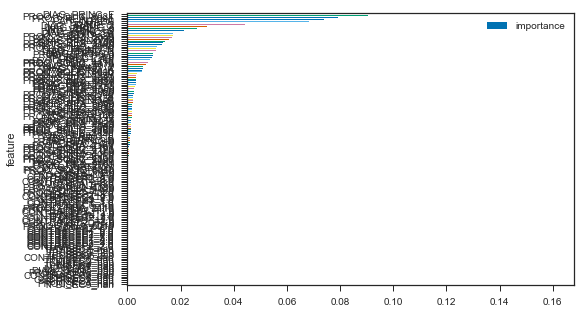

In [13]:
model.feature_importances_
imps = pd.DataFrame({'importance': model.feature_importances_, 'feature': X_train.columns}).sort_values('importance')
                    
imps.plot(x='feature',y='importance',kind='barh')

             feature  importance
70      DIAG_PRINC_D    0.001023
93       CAR_INT_5.0    0.001043
78      DIAG_PRINC_L    0.001055
59     PROC_REA_4140    0.001207
11   PROC_SOLIC_3050    0.001280
29   PROC_SOLIC_4160    0.001284
12   PROC_SOLIC_3080    0.001330
34   PROC_SOLIC_5060    0.001365
49     PROC_REA_4040    0.001368
57     PROC_REA_4120    0.001374
43     PROC_REA_3050    0.001380
86      DIAG_PRINC_T    0.001516
83      DIAG_PRINC_Q    0.001582
27   PROC_SOLIC_4140    0.001631
134     TPDISEC3_1.0    0.001707
84      DIAG_PRINC_R    0.001712
44     PROC_REA_3080    0.001747
16   PROC_SOLIC_4030    0.001778
32   PROC_SOLIC_5030    0.001786
64     PROC_REA_5030    0.001788
66     PROC_REA_5060    0.001971
19   PROC_SOLIC_4060    0.002009
71      DIAG_PRINC_E    0.002054
28   PROC_SOLIC_4150    0.002164
85      DIAG_PRINC_S    0.002199
17   PROC_SOLIC_4040    0.002388
131     TPDISEC2_1.0    0.002501
50     PROC_REA_4050    0.002571
51     PROC_REA_4060    0.002574
60     PRO

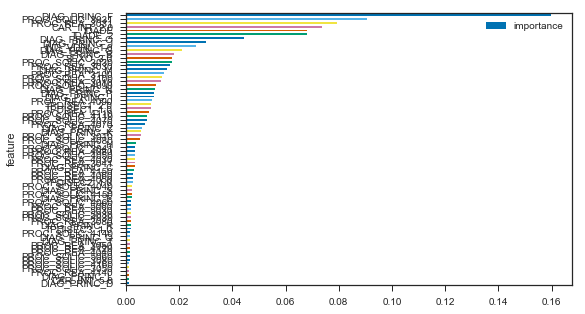

In [14]:
#imps['importance'>0.005]
imps_filt = imps[imps['importance']>0.001]
print(imps_filt)

imps_filt.plot(x='feature',y='importance',kind='barh')
plt.show()

In [17]:
print(Y_train.shape)
print(y_train_pred.shape)
print(Y_test.shape)
print(y_test_pred.shape)

(105090,)
(105090,)
(15013,)
(15013,)


In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

#print(str(recall_score(Y_train,y_train_pred)),' é o recall do training set')
#print(str(recall_score(Y_test,y_test_pred)), ' é o recall do test set')

#print(str(roc_auc_score(Y_train,y_train_pred)),' é o roc_auc do training set')
#print(str(roc_auc_score(Y_test,y_test_pred)), ' é o roc_auc do test set')

0.263592420524  é o R2 do training set
0.2691024775  é o R2 do test set
41.1121553511  é o MSE do training set
39.4189586025  é o MSE do test set
2.25806028377  é o MAE do training set
2.26102879751  é o MAE do test set


In [180]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(rd_df['DIAG_PRINC'],rd_df['DIAS_PERM'])
plt.show()

NameError: name 'rd_df' is not defined

In [9]:
import numpy as np
corr = np.corrcoef(rd_df_dummy,rowvar=False)
corr = corr**2
head(corr)
#plt.figure(figsize=(30,30))
#ax = sns.heatmap(corr,vmax=.3,vmin=-0.5, square=True,xticklabels=data.columns,yticklabels=data.columns,annot=True, annot_kws={"size": 10})
#plt.show()

MemoryError: 

In [28]:
from scipy.stats import spearmanr

rho, pval = spearmanr(data_Y,data_X,axis=0)

#corr = np.corrcoef(data,rowvar=False)
#corr = corr**2
#center = np.average(corr)

#print(corr)

rho_adj = rho**2
rho_adj = np.sqrt(rho_adj)

plt.figure(figsize=(30,30))
ax = sns.heatmap(rho_adj,vmax=.6,vmin=0, square=True,xticklabels=data.columns,yticklabels=data.columns,annot=True, annot_kws={"size": 10})
plt.show()

NameError: name 'data_Y' is not defined